# Pipeline for analysis

## Pre processing raw data

Importing the appropiate directories

In [ ]:
from DE import networkAnalysis as na

clusterDirectory need to point towards directory in which all the clusters can be found. 
It will then loop through all of the data files, gathering the sample ids from all cluster and create individual .csv files for analysis in R

In [ ]:
csvpath = "data/test.csv"
obj = na()
obj.readCsv(csvpath)
obj.renameCol('Unnamed: 0', 'gene_id')

In [ ]:
obj.medlog2(1)

In [ ]:
bottom = 0.5
top = 1
obj.filterVariantGenes(bottom, top)

In [ ]:
obj.toCsv('../software/data/test_var({}).txt'.format(bottom*100), '\t')

## Running SRIQ

In [ ]:
from runSRIQ import runSRIQ as rs
import numpy

In [ ]:
# data = 'test_var({})'.format(variance*100)
data = 'test_mc_log2var(80)'
# cutOff = [round(x, 2) for x in numpy.arange(0.4,0.9, 0.02)]
cutOff = [0.9,0.89,0.88,0.87,0.86,0.85,0.84,0.83,0.82,0.81,0.80,0.79,0.78,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.7,0.69,0.68,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.6,0.59,0.58,0.57,0.56,0.55,0.54,0.53,0.52,0.51,0.5,0.49,0.48,0.47,0.46,0.45,0.44,0.43,0.42,0.41,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.32,0.31,0.3,0.29,0.28,0.27,0.26,0.25,0.24,0.23,0.22,0.21,0.2,0.19,0.18,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.0]

In [ ]:
rs(data, cutOff)

Set path to the cluster you want to evaluate

In [ ]:
from IPython.display import Image

path = '../software/output/VRLA_test_10000itr_500var_10r/10000/QC_Spiral(false)/VRLA_test_10000_Clusters_Frequencies.png'
Image(filename=path)

## Overview of the output

In [ ]:
from DE import networkAnalysis as na
csvpath = '../software/data/test_mc_log2var(80).txt'
clusterpath = '../software/output/VRLA_test_10000itr_500var_10r/10000/QC_Spiral(false)/dist(0.76)/3'
cutoffs = {0.49:[6], 0.42:[4]}
demo = na()
demo.demoRun(cutoffs, csvpath,clusterpath, columnname = 'Gene')

## Visualizing SRIQ output

Creates the object from the SRIQ output

/home/jacob/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


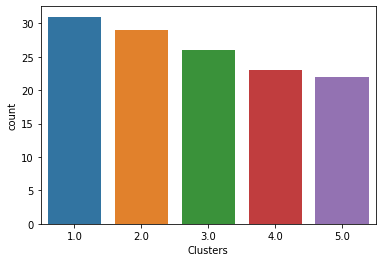

In [1]:
from DE import networkAnalysis as na
import pandas as np
import seaborn as sns
csvpath = '../software/data/test_mc_log2var(80).txt'
# cp = '/home/jacob/examensarbete/software/output/allt/sparad/10000/QC_Spiral(false)/dist(0.43)/4'
cp = '../software/output/VRLA_test_10000itr_1200var_10r/10000/QC_Spiral(false)/dist(0.48)/5'
test = na()

test.readSRIQ(csvpath, cp, columnname = 'Gene')

Plots the metagenes in an boxplot

In [ ]:
test.metaGenes()

Barplot of the p values from normality test of the genes

In [ ]:
test.normalityTest()

Creates a pca model and displays it screeplot

In [ ]:
test.screePlot()

In [ ]:
test.pcaPlot()

In [ ]:
test.Umap(2)

Calculates the centroids for each sample. Distribution plot will be shown, and when plotting the genexpression as labels for the samples

In [ ]:
test.centroids(method = 'pearson')

Filter variance, both bottom and top can be filtered.

In [ ]:
bottom = 0.7
top = 0.95
test.filterVariantGenes(top = top, bottom = bottom)

Performs desired test for differential gene expression analysis.

In [ ]:
test.diffGeneAnalysis(test = 'mannwhitneyu')

Filter the significant genes based of desired filteringtype.

In [ ]:
test.filtering(filteringType = 'log2fold', threshold = 2)

### Add features from data folder

To run this module you need clinical with followup data if running on TCGA data from https://gdc.cancer.gov/about-data/publications/pancanatlas in clinicalData folder

In [ ]:
import pandas as pd
if isinstance(test.col_colors, pd.DataFrame): test.col_colors = test.col_colors['Clusters']

test.addFeature(feature = 'tobacco_smoking_history', attr = 'Lifelong Non-smoker', censor='[Not Available]', title = 'Never-smokers')
test.addFeature(feature = 'gender', attr = 'MALE', title = 'Males')
test.addFeature(feature = 'gender', attr = 'FEMALE', title = 'Females')

Plots a clustermap of the result

In [ ]:
test.clusterMap(vmin = -1, vmax = 1, row_cluster= True)

Kaplan meier plot

In [ ]:
test.kaplanMeier()

## Enrichment analysis

Converts the enrichment list to symbols if in ensembleIDs

In [ ]:
test.ensemble2gene()

Fetches the most significant dbs for each cluster and saves them into a list called dbs

In [ ]:
goDbs = ['GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018']
test.enrichR(dbs = goDbs)
test.plotBar()

Survival analysis

## Visualing genes

Takes single list of genes as argument

In [ ]:
test.plotSingleGene(['KRAS', 'EGFR'])

Takes list of lists of genes as argument

In [ ]:
test.plotMultipleGenes(['KRAS', 'EGFR'])

### TCGA data analysis

To run follow module, signature profiles need to be downloaded from http://tardis.cgu.edu.tw/msignaturedb/ or create on your own if not available using https://cancer.sanger.ac.uk/signatures/ into the clinicalData folder

In [ ]:
test.plotSignatures()

To run following module data from https://gdc.cancer.gov/about-data/publications/panimmune need to be imported into the clinicalData folder.

In [ ]:
test.boxplotExternalData(3)

# Export to GSEA

Starts writing the .cls file

In [ ]:
output =f'{len(test.samples)} {len(test.sortedClusters)} 1'
output += f'\n# {" ".join([str(i) for i in range(1, 1+len(test.sortedClusters))])}'
lista = [str(int(x)) for x in list(test.tDf['Clusters'])]

Run ONLY if you want to combine clusters together

In [ ]:
lista = ['1' if x != '4' else '2' for x in lista]

Writes the .cls file

In [ ]:
output += f'\n{" ".join(lista)}'
with open('data/gsea/data.cls', 'w') as file:
    file.write(output)

Fetches the symbol names to be used in gsea

In [9]:
test.ensembl2symbol()

This may produce duplicate indexes which will be removed, keeping the first occurence


Creates expression file for gsea

In [5]:
import numpy as np
# df = test.symbolDf.filter(items = allGenes, axis = 'index')
df = test.symbolDf
df.insert(0, 'NAME', value  = df.index.tolist())
df.insert(1, 'DESCRIPTION', [np.nan for x in range(len(df.index))])

In [ ]:
import itertools
allGenes =  (list(itertools.chain.from_iterable(test.eList)))

In [ ]:
df = df[df['NAME'].isin(allGenes)]

In [ ]:
df.to_csv('data/gsea/genes.txt', sep = '\t', index = False)